# Unsupervised Learning - Assignment

### 1. Load and understand the data

#### 1.1 Import required Python packages 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
sns.set(color_codes=True)
import scipy.stats as stats
import tabulate
from sklearn.decomposition import PCA

#### 1.2 Set Display settings

In [2]:
from IPython.core.display import HTML, display
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
div.text_cell_render {
font-family: "Trebuchet MS", "Helvetica", sans-serif;
}
</style>
""")

In [3]:
def display_table(data):
    html = "<table>"
    for row in data:
        html += "<tr>"
        for field in row:
            html += "<td style='color:#6C3483'><h4>%s</h4><td>"%(field)
        html += "</tr>"
    html += "</table>"
    display(HTML(html))

#### 1.2 Read data set and print the shape of the data

In [4]:
pdata = pd.read_csv("vehicle-1.csv")
print("Shape of the data set is ",pdata.shape)
pdata.head(10)

Shape of the data set is  (846, 19)


compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

#### 1.3 List data types of all attributes

In [5]:
pdata.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

####  <font color='blue'>There are 18 numeric variables (independent) and one categorical variable "class" (dependent)</font>

#### 1.4 Check for missing values

In [6]:
n_missingvalues=pdata.isnull().values.sum()
if (n_missingvalues==0):
    print ("There are no missing values in the data")
else:
    print ("There are",n_missingvalues,"missing values in the data")

There are 41 missing values in the data


#### <font color='blue'>There are 41 missing values in the data spread across the different attributes. We will fill the missing values with the median value for the attribute<br><br><u>Note</u>:As discovered in the subsequent analysis, there are many attributes that have high level of skewness. Hence a "median" strategy would work better compared to "mean" strategy for filling missing values</font>

In [7]:
#filling the missing values only for numberical attributes
X = pdata.drop('class', axis=1)
cols=X.columns

from sklearn.impute import SimpleImputer
repnan = SimpleImputer(missing_values=np.nan, strategy='median')
X = pd.DataFrame(repnan.fit_transform(X))
X.columns=cols

#### <font color='blue'>Let's check for missing values after filling the data set with median values</font>

In [8]:
n_missingvalues=X.isnull().values.sum()
if (n_missingvalues==0):
    print ("There are no missing values in the data")
else:
    print ("There are",n_missingvalues,"missing values in the data")
X.head(10)

There are no missing values in the data


compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
4         85.0         44.0                  70.0         205.0   
5        107.0         44.0                 106.0         172.0   
6         97.0         43.0                  73.0         173.0   
7         90.0         43.0                  66.0         157.0   
8         86.0         34.0                  62.0         140.0   
9         93.0         44.0                  98.0         167.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
4                 103.0                     52.0          149.0   
5                  50.0                      6.0          255.0   
6                  65.0                      6.0          153.0   
7                  65.0                      9.0          137.0   
8                  61.0                      7.0          122.0   
9                  62.0                     11.0          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                      159.0   
1           45.0                    19.0                      143.0   
2           32.0                    23.0                      158.0   
3           46.0                    19.0                      143.0   
4           45.0                    19.0                      144.0   
5           26.0                    28.0                      169.0   
6           42.0                    19.0                      143.0   
7           48.0                    18.0                      146.0   
8           54.0                    17.0                      127.0   
9           36.0                    22.0                      146.0   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio  
0             187.0          197.0  
1             189.0          199.0  
2             188.0          196.0  
3             199.0          207.0  
4             180.0          183.0  
5             181.0      

#### <font color='blue'>Comparing the original and the new dataframes, it can be observed that NaN values are replaced with the attribute median values</font>

#### 1.5 List a 5-point summary & mean of numerical attributes

In [9]:
X.describe().loc[['min','25%','50%','mean','75%','max']].T

min     25%    50%        mean     75%     max
compactness                   73.0   87.00   93.0   93.678487  100.00   119.0
circularity                   33.0   40.00   44.0   44.823877   49.00    59.0
distance_circularity          40.0   70.00   80.0   82.100473   98.00   112.0
radius_ratio                 104.0  141.00  167.0  168.874704  195.00   333.0
pr.axis_aspect_ratio          47.0   57.00   61.0   61.677305   65.00   138.0
max.length_aspect_ratio        2.0    7.00    8.0    8.567376   10.00    55.0
scatter_ratio                112.0  147.00  157.0  168.887707  198.00   265.0
elongatedness                 26.0   33.00   43.0   40.936170   46.00    61.0
pr.axis_rectangularity        17.0   19.00   20.0   20.580378   23.00    29.0
max.length_rectangularity    118.0  137.00  146.0  147.998818  159.00   188.0
scaled_variance              130.0  167.00  179.0  188.596927  217.00   320.0
scaled_variance.1            184.0  318.25  363.5  439.314421  586.75  1018.0
scaled_radius_of_gyration    109.0  149.00  173.5  174.706856  198.00   268.0
scaled_radius_of_gyration.1   59.0   67.00   71.5   72.443262   75.00   135.0
skewness_about                 0.0    2.00    6.0    6.361702    9.00    22.0
skewness_about.1               0.0    5.00   11.0   12.600473   19.00    41.0
skewness_about.2             176.0  184.00  188.0  188.918440  193.00   206.0
hollows_ratio                181.0  190.25  197.0  195.632388  201.00   211.0

#### <font color='blue'>The following observations can be made from the 5-point summary<br><br><li>Most of the attributes are seen to have normal distribution with less difference between mean and median. However, there are a few attributes that have a high degree of skewness</li><br><br><li>Attributes scaled_variance and scaled_variance.1 seem to be having a positive skewness with a right tail</li><br><br><li>scatter_ratio is also seen to be skewed on the right side of the distribution</li><br><br>This will be further verified when we perform univariate & mutlivariate analysis in the following sections</font>

### 2. Univariate & Bivariate Analysis

#### 2.1 Analysis using Distribution Plots 

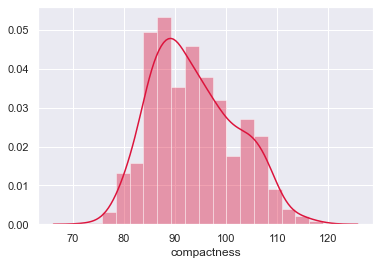

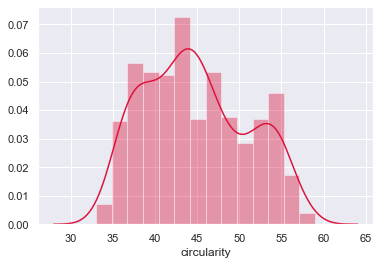

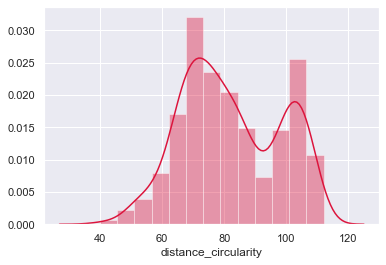

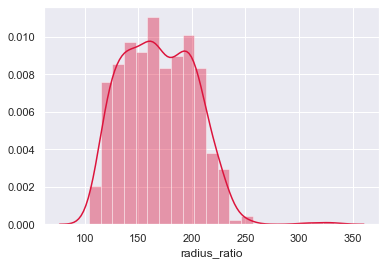

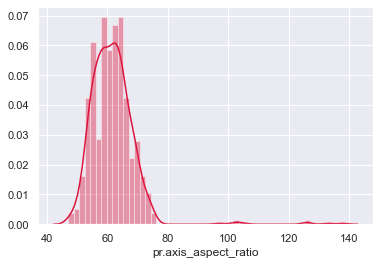

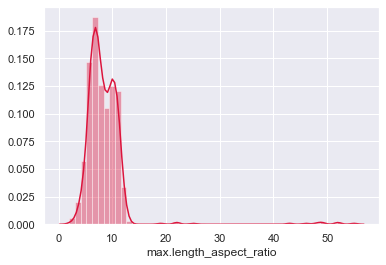

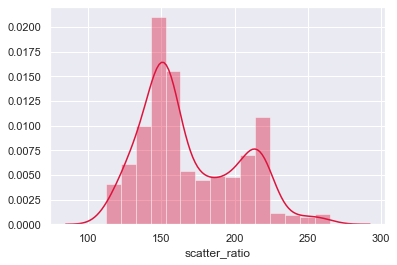

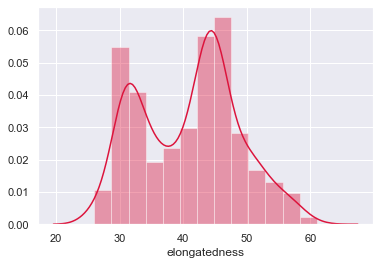

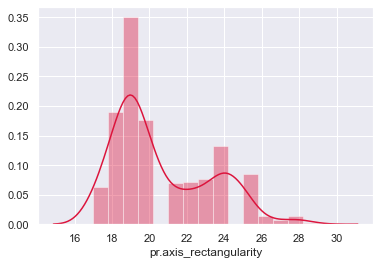

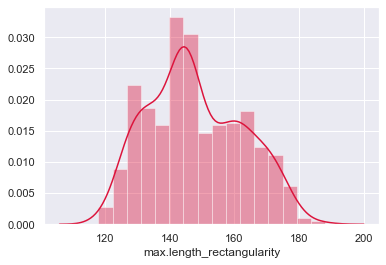

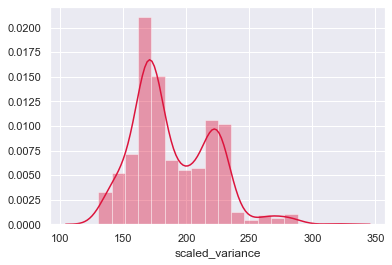

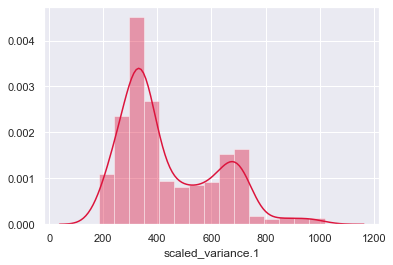

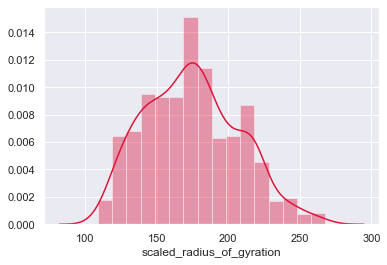

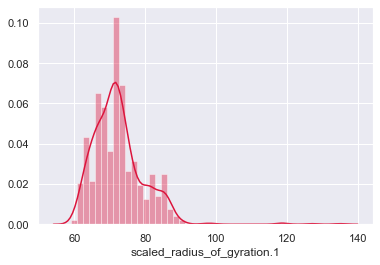

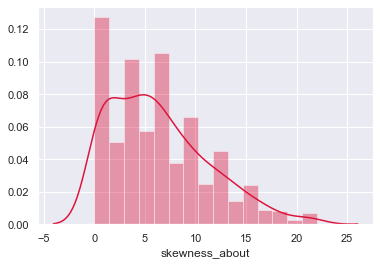

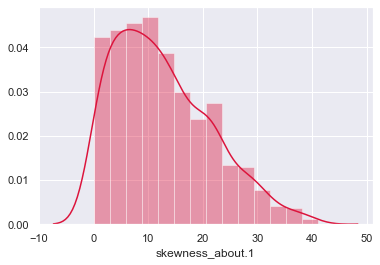

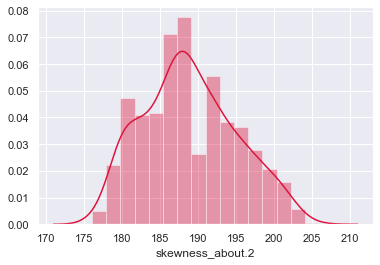

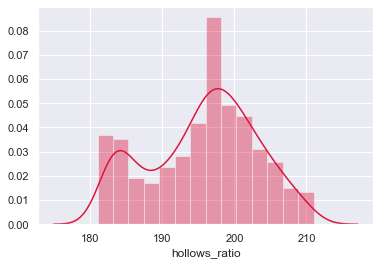

In [10]:
for i in X.columns:
    plt.figure(i)
    sns.distplot(X[i],color = 'crimson');

#### 2.2 Find skewness of distribution for all attributes

In [11]:
table=[['Attribute','Skewness']]
for i in X.columns:
    l = [i,round(X[i].skew(),2)]
    table.append(l)
display_table(table)

#### <font color='blue'>Inferences:<br><br>&nbsp;&nbsp;&nbsp;&nbsp;<li>Most of the attributes have a multi-modal distribution with <i>two or three distinct peaks</i></li><br><br>&nbsp;&nbsp;&nbsp;&nbsp;<li><i>pr.axis_aspect_ratio, max.length_aspect_ratio and scaled_radius_of_gyration.1 have very highly skewed distributions with a long right tail</i><br><br>&nbsp;&nbsp;&nbsp;&nbsp;<li><i>scatter_ratio, scaled_variance, scaled_variance.1, skewness_about and skewness_about.1</i> have a distinct right tail indicating a moderately positive skewed distribution<br><br>&nbsp;&nbsp;&nbsp;&nbsp;<li>Attributes such as <i>elongatedness, scatter_ratio, max.length_aspect ratio, scaled_variance, scaled_variance.1, hollows_ratio</i> have distinct 2-3 peaks in the distribution, meaning the data points naturally tend to fall into 2-3 clusters</li><br><br><li>pr.axis_rectangularity has some two distinct minima in its distribution, again indicating that the data is clustered along 2-3 groups</li><br><br>The inferences are further confirmed by the Box Plots for all attributes, that are shown below</font>

#### 2.3 Analysis using Box plots

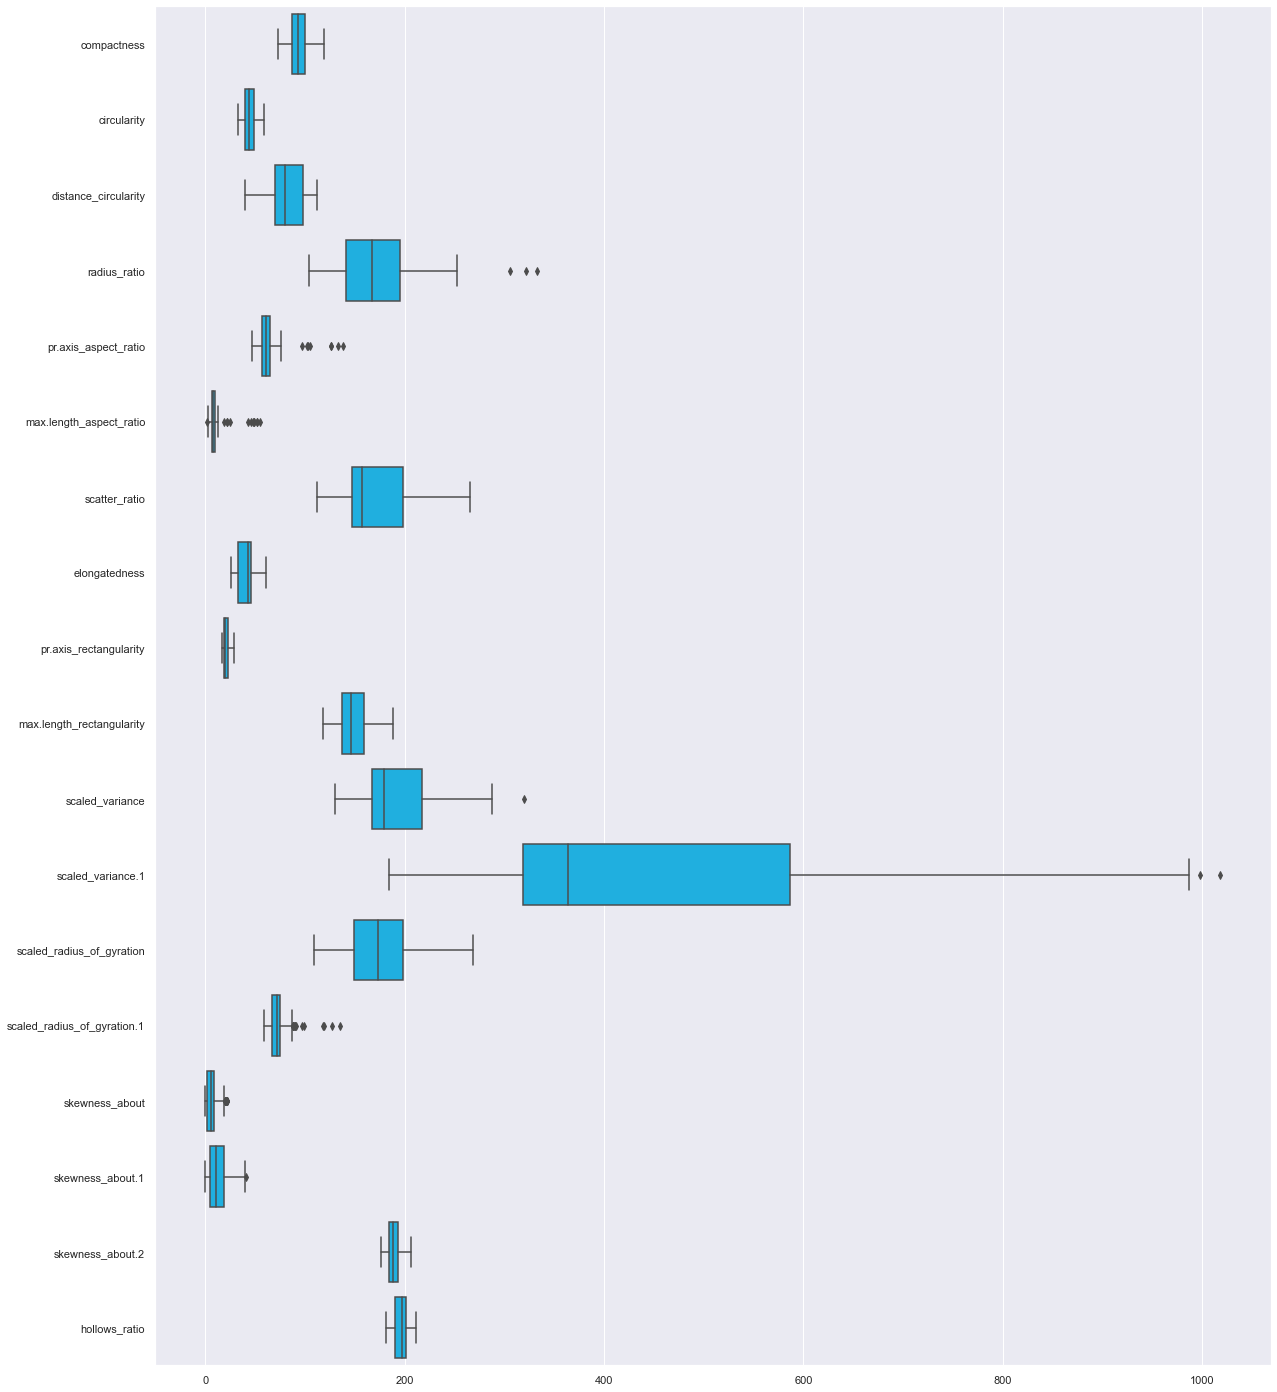

In [12]:
plt.subplots(figsize=(20,25))
sns.boxplot(data=X,orient='h', color='deepskyblue')

#### 2.4 Analysis using correlation between attributes

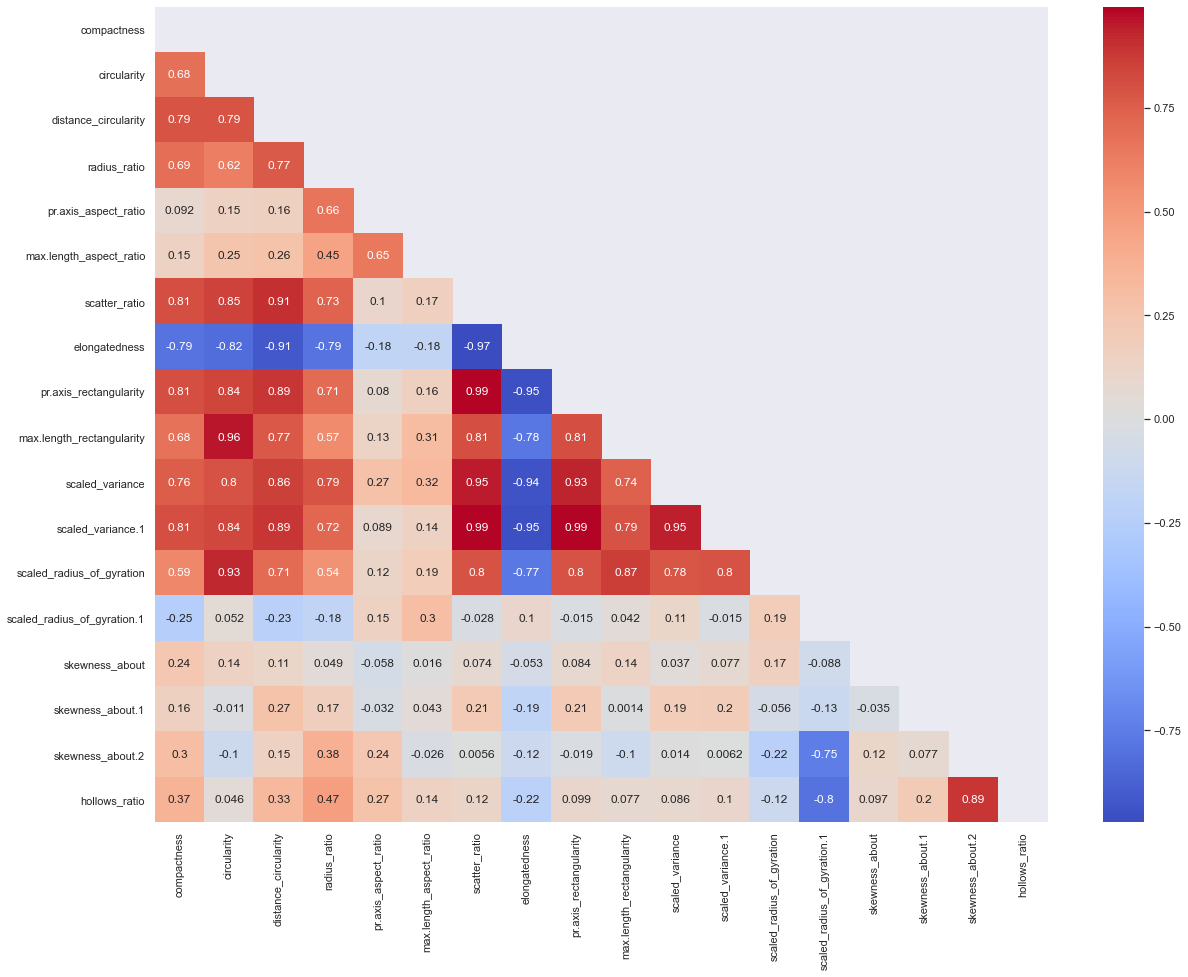

In [13]:
plt.subplots(figsize=(20,15))
matrix = np.triu(X.corr())
sns.heatmap(X.corr(),cmap='coolwarm',annot=True, mask=matrix)

#### <font color='grey'>Inferences:<br><br>1. The following attributes have very high positive correlation (C >= 0.9)<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='red'><li>scatter_ratio with [distance_circularity, pr.axis_rectangularity, scaled_variance, scaled_variance.1]</li><br><li>circularity with [max_length_rectangularity, scaled_radius_of_gyration]</li><br><li>skewness_about.2 with [hollows_ratio]</li></font><br><br>2.The following attributes have very high negative correlation (C <= -0.9)<br><br><li><font color='blue'>elongatedness with [distance_circularity, scatter_ratio, pr.axis_rectangularity,scaled_variance,scaled_variance.1]</li><br><br></font><br>3.The other attributes have little to moderate +ve or -ve correlation with each other<br><br>4. The following pairplots also provide more insight into attribute correlations</font></font>

#### 2.5 Pairplots of all attributes

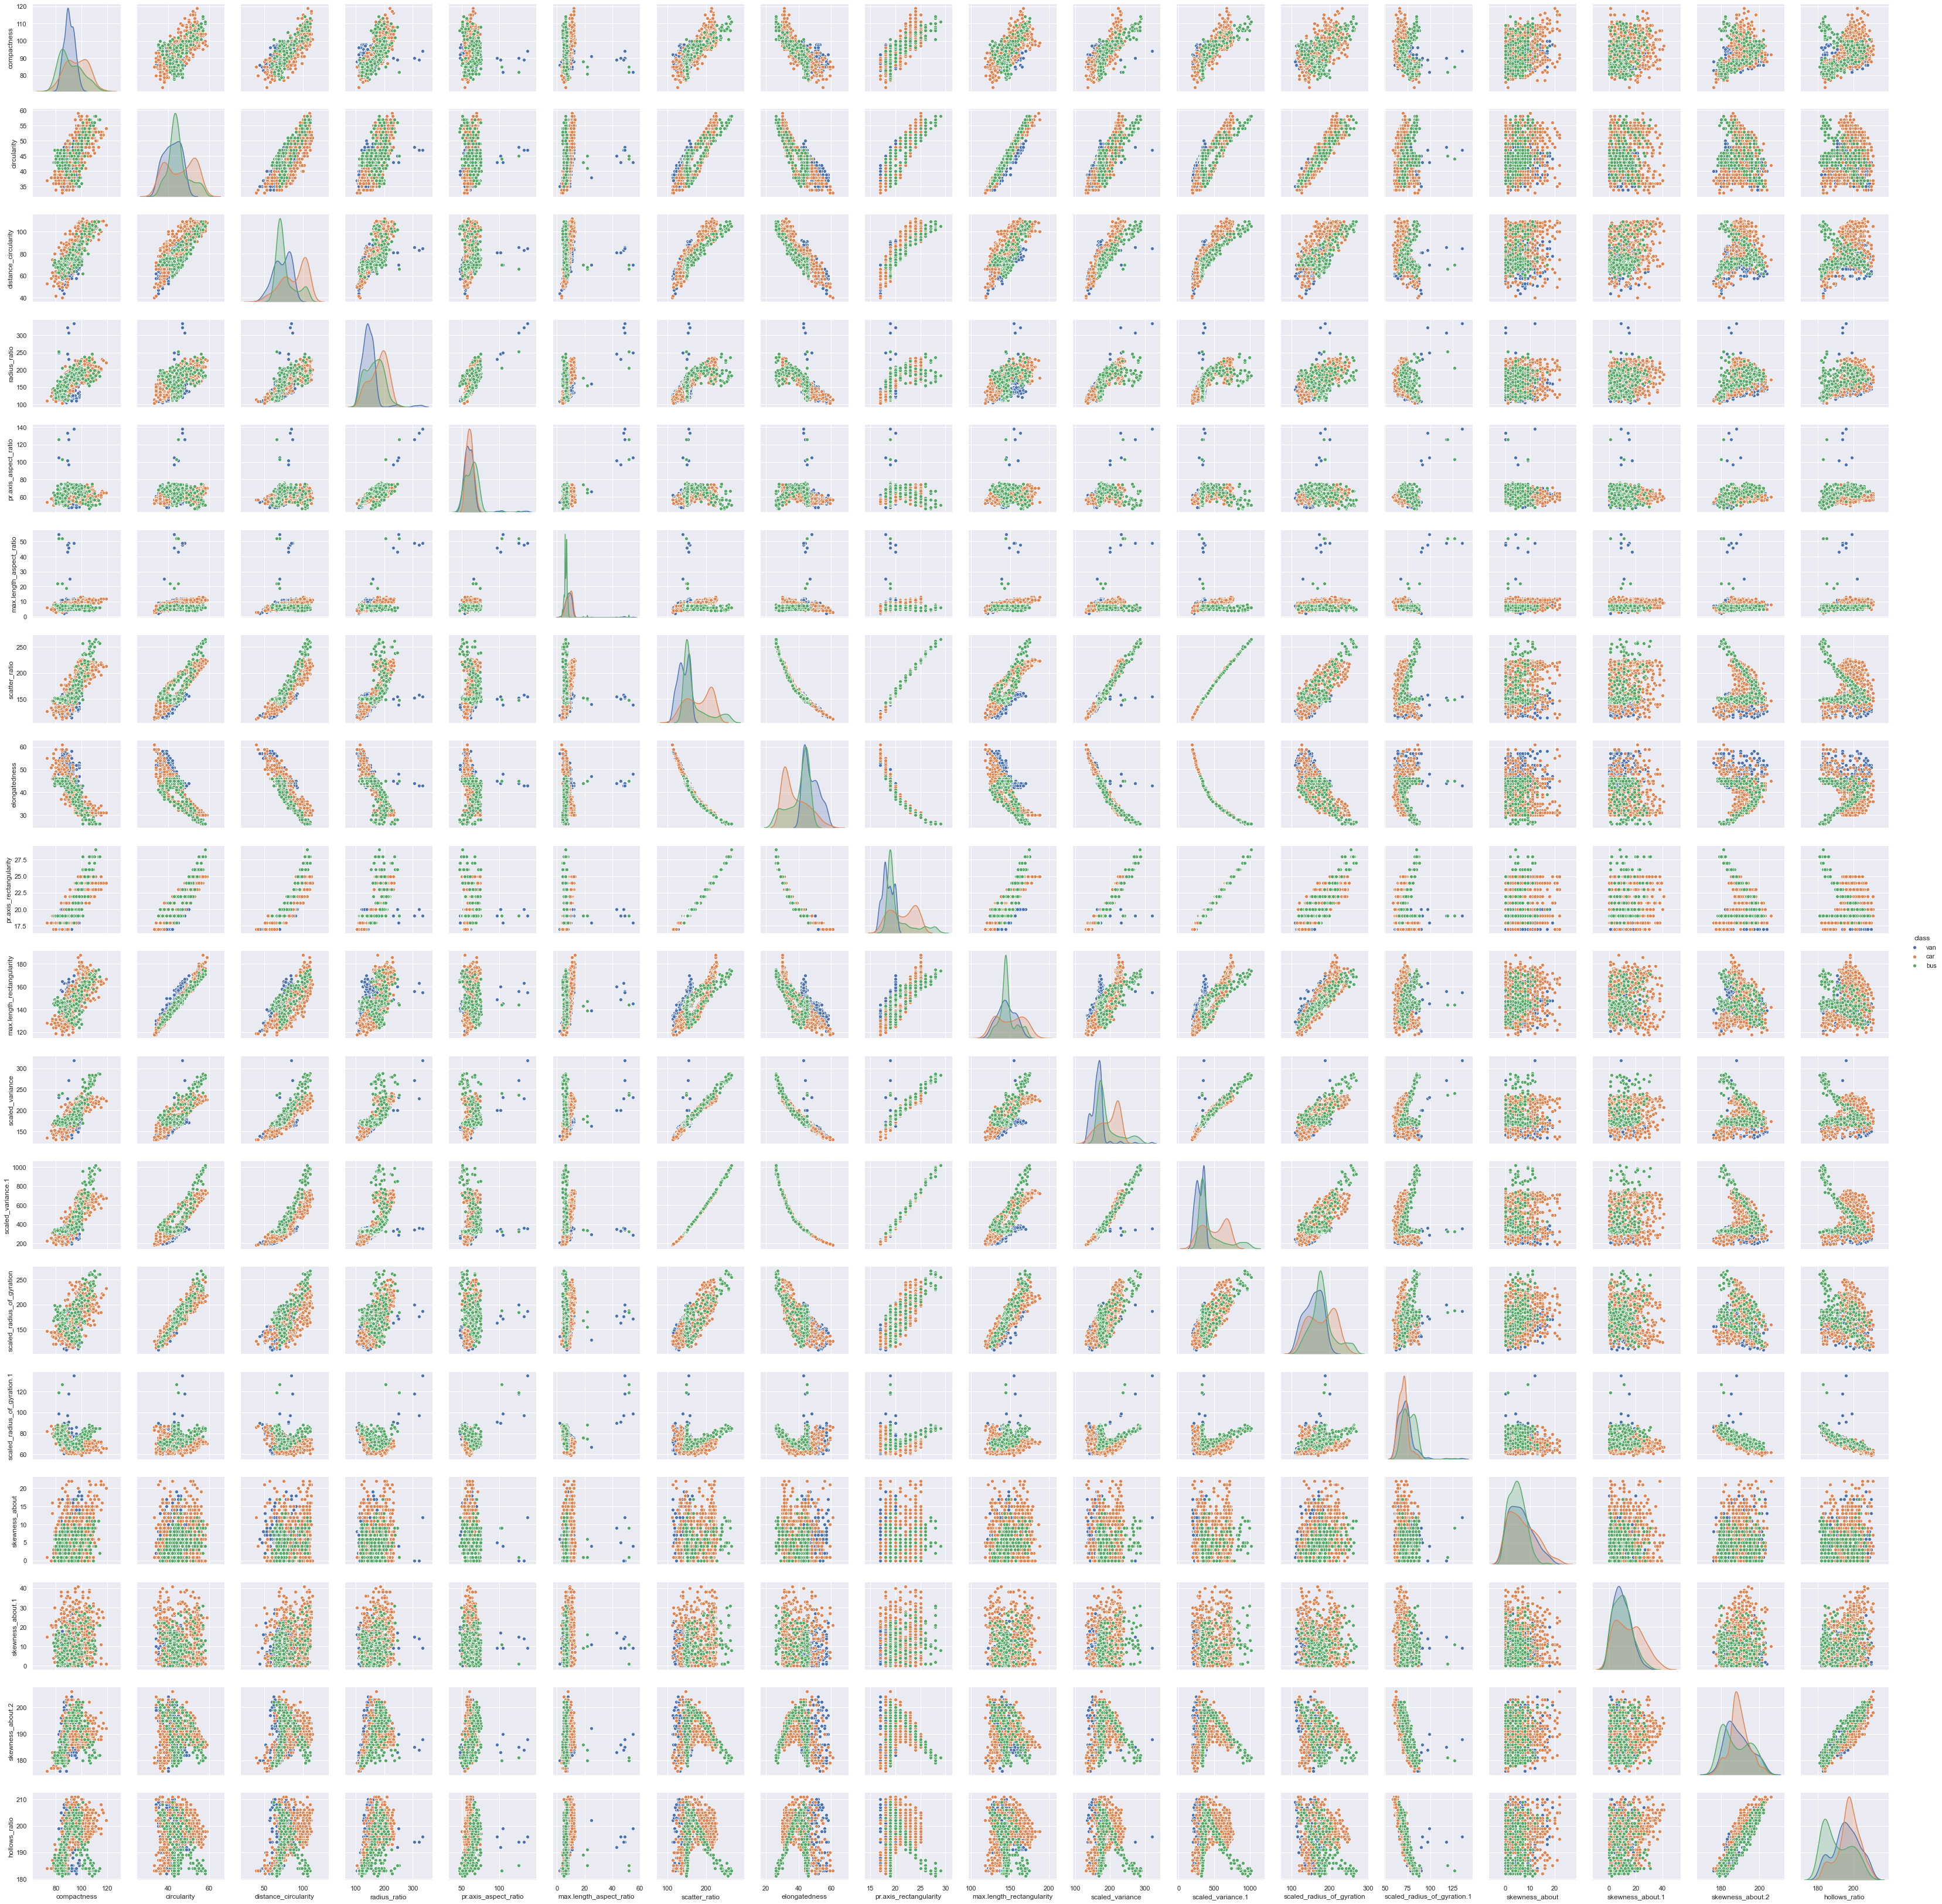

In [14]:
#sns.pairplot(X,diag_kind='kde')
sns.pairplot(pdata, hue='class',diag_kind='kde')

#### <font color='blue'>Inferences<br><br><li>The pairplot confirms the correlations between attributes that were observed. For e.g. <font color='green'>pr.axis_rectangularity and scatter_ratio</font> have a positively sloping linear relationship showing high +ve correlation whereas <font color='red'> elongatedness and distance_circularity</font> have a negatively sloping line showing a high negative correlation</li><br><li>The presence of a large number of +vely correlated attributes (C > 0.9) indicates that we can reduce those attributes without losing the accuracy on the test set(Dimensionality reduction). These columns are indicated in Section 2.4</li><br><li>The data set suffers from a high degree of multi-collinearity i.e. presence of many highly correlated attributes</li></font>

#### In Sections 3-5, we train the data set using SVM using all the 18 attributes and note the accuracy. 

### 3. Split the data into train and test sets

#### <font color='blue'>We will use 70% of data for training and 30% for testing. We normalize the data set before training models on it, so that all attributes are standardized to one scale</font>

In [15]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

#Convert attributes to z-Scores in order to normalize the units
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 
y = pdata['class']
x_train, x_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.3, random_state=59)

#### <font color='blue'>The random state used for splitting the train/test data set will be used again when training the model using Principal Components. This is to ensure that the accuracy comparison is made over identical train/test data points</font>

### 4. Training the model using SVM

#### 4.1 Model Training

              precision    recall  f1-score   support

         bus       0.97      0.96      0.97        73
         car       0.98      0.98      0.98       126
         van       0.89      0.93      0.91        55

    accuracy                           0.96       254
   macro avg       0.95      0.95      0.95       254
weighted avg       0.96      0.96      0.96       254



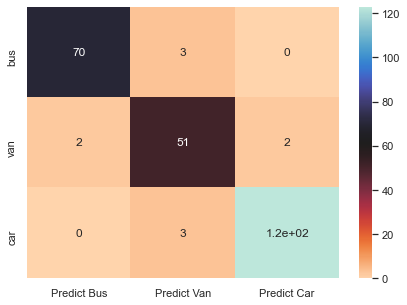

In [16]:
from sklearn import svm
from sklearn import metrics

#Create and fit the model on the training data set
clf = svm.SVC(gamma=0.05, C=20)
clf.fit(x_train , y_train)
y_predict = clf.predict(x_test)
y_predict

#Compute and print the confusion matrix 
cm=metrics.confusion_matrix(y_test, y_predict, labels=['bus', 'van','car'])
df_cm = pd.DataFrame(cm, index = [i for i in ["bus","van",'car']],
                  columns = [i for i in ["Predict Bus","Predict Van","Predict Car"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,cmap='icefire_r')

#Print the model performance metrics
print(metrics.classification_report(y_test, y_predict))

#### <font color='blue'>Using Support Vector Machine for training the model with <i><b>all attributes</b></i>, the accuracy on the test set is observed to be <font color='red'>96%</font></font> 

### 5. K-fold cross validation

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=59, shuffle=True)

#Create and fit the model on the training data set
clf = svm.SVC(gamma=0.05, C=20)

# evaluate model
scores = cross_val_score(clf, XScaled, y, scoring='accuracy', cv=cv)
print(np.around(scores,decimals=2))
# report performance
print('Accuracy: %0.2f (%0.2f)' % (np.mean(scores), np.std(scores)))

[0.99 0.99 0.95 1.   0.98 0.99 0.99 0.98 0.99 0.99]
Accuracy: 0.98 (0.01)


#### <font color='blue'>Using K-Fold Cross Validation, the accuracy of the model observed to be <font color='red'>98&PlusMinus;1%</font>, meaning that the model can have an accuracy of <font color='red'>97% - 99%</font> in production, when using K-Fold cross validation. At a 95% confidence interval, the accuracy of the model can be in the range of <font color='red'>98&PlusMinus;2%</font>, i.e. <font color='red'>96% - 98%</font></font> 

#### <font color='green'>In the following sections, we will use Principal Component Analysis to reduce the dimensions of the data set. The principal components will be chosen such that they retain 95% of the variance in data i.e. there is not a significant loss of information that is originally held within all attributes. We will then train the reduced dimension data set and note down the accuracy. We expect that there will not be a significant drop in accuracy while using PCA</font>

### 6. Principal Component Analysis - Dimensionality Reduction

#### 6.1 Covariance Matrix & Eigenvalues calculation

#### <font color='blue'>The covariance matrix describes correlation between the 18 attributes of the dataset and helps to identify highly dependent attributes</font>

In [18]:
# Determine covariane matrix and eigenvalues, eigenvectors
covMatrix = np.cov(XScaled.T)

#### <font color='blue'>Next, we find the eigenvectors of the covariance matrix, which represent the principal components of the data set. The eigenvectors represent the axes of the new feature space to which the data set has to be transformed</font>

#### <font color='blue'>The eigenvalues represent the magnitude of the eigenvectors.Sorted in descending order, they indicate the relative significance of the attributes in representing information. Higher eigenvalue vectors are chosen as principal components and lower eigenvalue vectors can be discarded from the analysis without much loss in information</font>

In [19]:
eigenvalues, eigenvectors = np.linalg.eig(covMatrix)
eig_pairs = [(eigenvalues[i], eigenvectors[:,i]) for i in range(len(eigenvalues))]

# Sort eigenvalues and eigenvector pairs in descending order of eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[i][0] for i in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[i][1] for i in range(len(eigenvalues))]

print('The Eigenvalues in descending order are as follows: \n%s' %eigvalues_sorted)

The Eigenvalues in descending order are as follows: 
[9.404602609088707, 3.014922058524637, 1.903525021838969, 1.1799374684450192, 0.9172606328594369, 0.5399926288001122, 0.3588701179293976, 0.22193245599893463, 0.16060859663511756, 0.09185722339516107, 0.06649941176460186, 0.046600599441877055, 0.035794718913038724, 0.02741206573719495, 0.02057928707088867, 0.017916631432236523, 0.010025789847556182, 0.0029644574250445354]


#### <font color='blue'>We calculate the % contribution of each eigenvalue across all eigenvalues. Then we accumulate the % contributions and retain only those attributes that are sufficient to explain 95% of variance in data</font>

In [20]:
eigenvalues_total = sum(eigenvalues) #Sum of all eigenvalues

# Ratio of each eigenvalue to the total 
explained_variance_ratio_ = [(i / eigenvalues_total) for i in sorted(eigenvalues, reverse=True)]

# Cumulative variations
cum_var_explained_ = np.cumsum(explained_variance_ratio_)  

#### 6.2 Plot Explained Variation Ratio & Cumulative Explained Variations

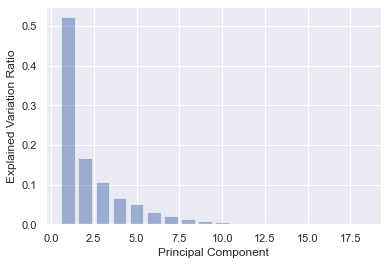

In [21]:
plt.bar(list(range(1,19)),explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Explained Variation Ratio')
plt.xlabel('Principal Component')
plt.show()

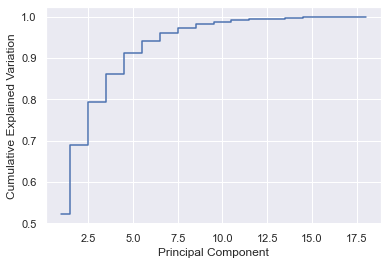

In [22]:
plt.step(list(range(1,19)),cum_var_explained_, where='mid')
plt.ylabel('Cumulative Explained Variation')
plt.xlabel('Principal Component')
plt.show()

#### <font color='blue'>From the above plots, it is observed that <font color='red'>7 Principal Components</font> are sufficient to explain <font color='red'>95%</font> variation in the data. Hence, we will use only 7 Principal Components to train the data set without losing much information from the original feature space of 18 attributes</font> 

#### 6.3 Pairplots after dimensionality reduction

#### <font color='blue'>Now, we use Use PCA from Scikit learn to project data from the original 18-dimension feature space to the reduced 7-dimension space. Having transformed the feature space, let us look at the pair plots to observe how the principal components correlate with each other</font>

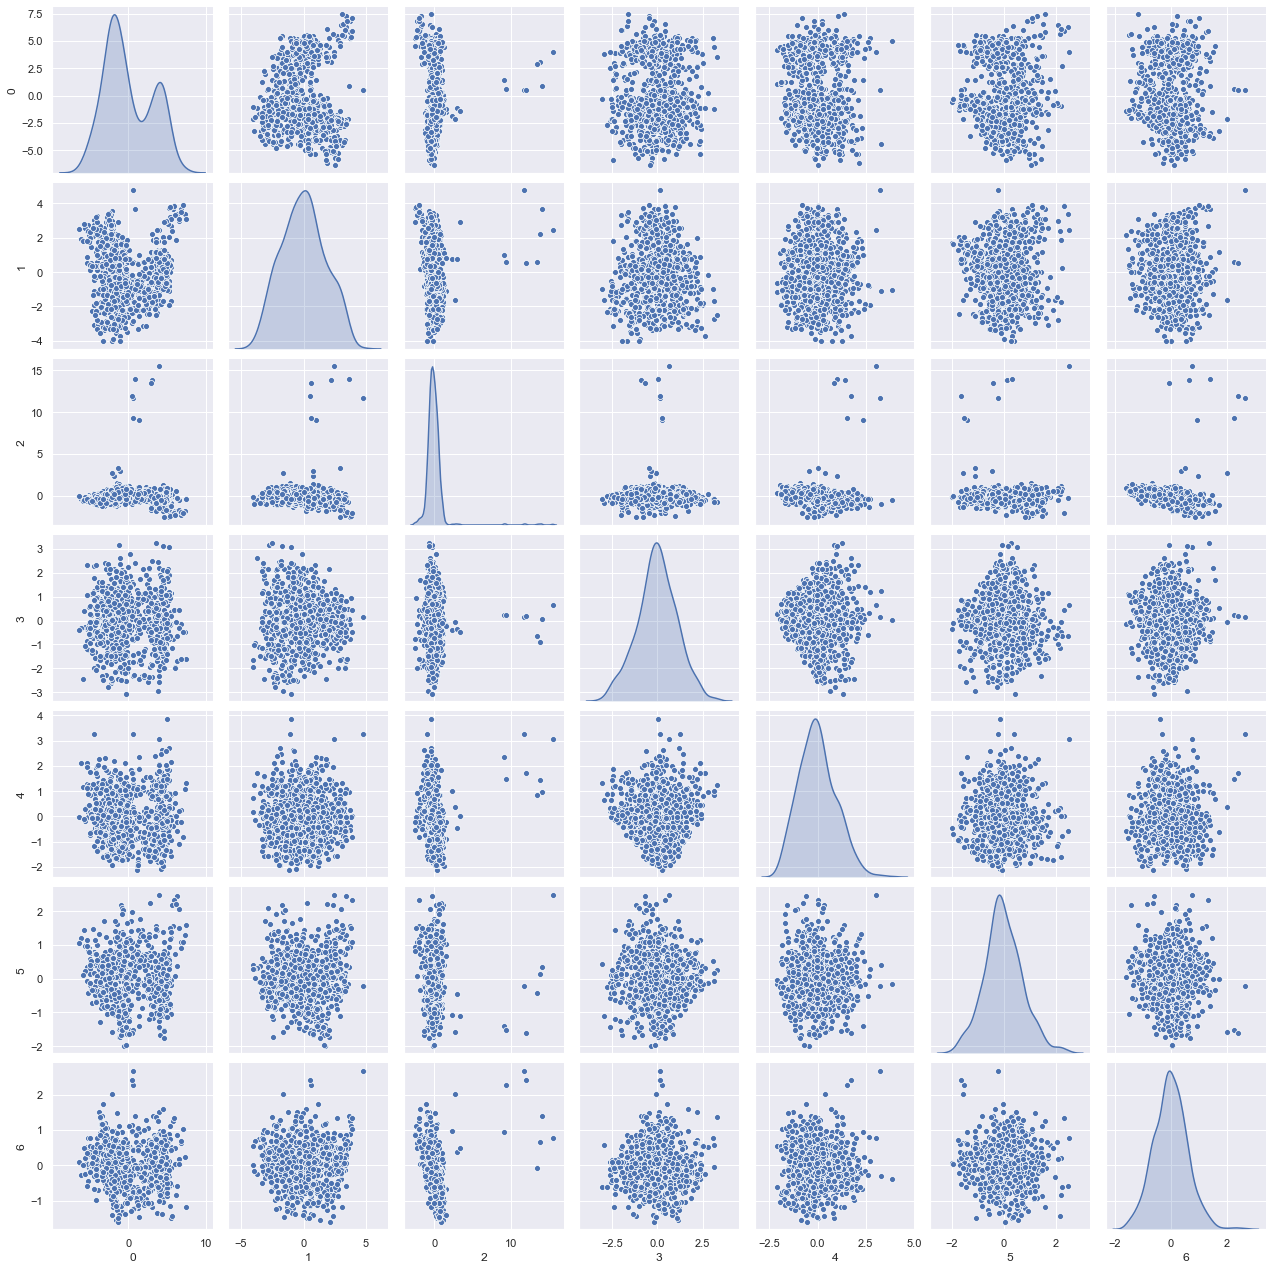

In [23]:
pca7 = PCA(n_components=7)
pca7.fit(XScaled)
#print(pca7.components_)
#print(pca7.explained_variance_ratio_)
Xpca7 = pca7.transform(XScaled)
sns.pairplot(pd.DataFrame(Xpca7),diag_kind='kde')

#### <font color='blue'>From the above plot, it is observed that<br><br><li>Attributes of the transformed feature set are independent of each other</li><br><li>Correlation of attributes is much lesser compared to the attributes of the non-transormed feature space</li><br><li>There are no linear relationships visibile in the plots, indicating low correlation values</li></font> 

### 7. Model fitting using Principal Components 

#### 7.1 Split the dataset into training and test data sets  

In [24]:
x_train, x_test, y_train, y_test = train_test_split(Xpca7, y, test_size=0.3, random_state=59)

#### <font color='blue'>Using the same random state as before, we ensure that the same rows of the data set are chosen for training and test separation</font> 

#### 7.2 SVM using Prinicipal Components 

              precision    recall  f1-score   support

         bus       0.89      0.92      0.91        73
         car       0.94      0.94      0.94       126
         van       0.85      0.84      0.84        55

    accuracy                           0.91       254
   macro avg       0.90      0.90      0.90       254
weighted avg       0.91      0.91      0.91       254



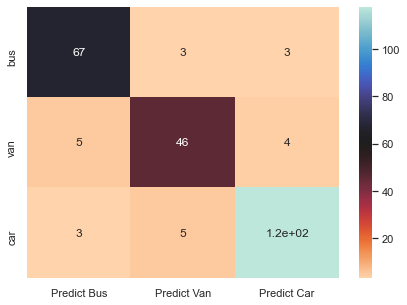

In [25]:
#Create and fit the model on the training data set
clf = svm.SVC(gamma=0.05, C=20)
clf.fit(x_train , y_train)
y_predict = clf.predict(x_test)
y_predict

#Compute and print the confusion matrix 
cm=metrics.confusion_matrix(y_test, y_predict, labels=['bus', 'van','car'])
df_cm = pd.DataFrame(cm, index = [i for i in ["bus","van",'car']],
                  columns = [i for i in ["Predict Bus","Predict Van","Predict Car"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,cmap='icefire_r')

#Print the model performance metrics
print(metrics.classification_report(y_test, y_predict))

#### <font color='blue'>Training the Support Vector Machine using Prinicpal Components, the accuracy on the same test set is observed to be <font color='red'>91%</font></font> 

### 8. Conclusion

#### <font color="#B03A2E"><li>Training SVM on the data set with 18 attributes resulted in a model accuracy of <font color='blue'>96%</font></li><br><li>We used PCA to reduce a large number (<font color='blue'>18</font>) of highly correlated attributes to a small number (<font color='blue'>7</font>) of uncorrelated attributes. This represents a <font color='blue'>60%</font> reduction in the number of attributes.</li><br><li>After using PCA to reduce it to 7 dimensions, the resulting SVM model accuracy was <font color='blue'>91%</font></li><br><li>Although there is a 5% drop in model accuracy, the model is able to explain <font color='blue'>95%</font> variance in information</li><br><li>Improved Data visualization : The original pair plots using 18 attributes were difficult to visualize. After reducing them to 7 attributes, the plots are not only compact and readable but also explain the independence of attributes very well</li><br><li>PCA helped in reducing the overfitting of data by using only the most relevant attributes</li><br><li>Reducing attributes leads to lesser computational complexity and helps filter out  information from noise</li><br><li>There are some disadvantages with PCA as well. For e.g. <i>intepretation</i> of the principal components is difficult, from a business point of view. We are not able to explain clearly which specific business attributes contribute to the value of dependent variable.</li></font>